In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Virat_Kohli_ODI_Data - Sheet1 - Clean.csv')

In [3]:
df.head(5)

,Match_No,Date,Versus,Ground,D/N,Dismissal_Type,Runs,Balls_Faced,Strike_Rate,Progressive_Aggr,Progressive_Avg,Progressive_Strike_Rate
0,1,18-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,lbw b K M D N Kulasekara,12,22.0,54.55,12,12.00,54.55
1,2,20-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,c C K Kapugedera b T Thushara,37,67.0,55.22,49,24.50,55.06
2,3,24-08-2008,Sri Lanka,R Premadasa Stadium,1,run out,25,38.0,65.79,74,24.67,58.27
3,4,27-08-2008,Sri Lanka,R Premadasa Stadium,1,b T Thushara,54,66.0,81.82,128,32.00,66.32
4,5,29-08-2008,Sri Lanka,R Premadasa Stadium,1,lbw b K M D N Kulasekara,31,46.0,67.39,159,31.80,66.53


### Info on the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Match_No                 254 non-null    int64  
 1   Date                     254 non-null    object 
 2   Versus                   254 non-null    object 
 3   Ground                   254 non-null    object 
 4   D/N                      254 non-null    int64  
 5   Dismissal_Type           254 non-null    object 
 6   Runs                     245 non-null    object 
 7   Balls_Faced              245 non-null    float64
 8   Strike_Rate              245 non-null    object 
 9   Progressive_Aggr         254 non-null    int64  
 10  Progressive_Avg          254 non-null    float64
 11  Progressive_Strike_Rate  254 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 23.9+ KB


### Null value analysis

In [5]:
df.isnull().sum()

Match_No                   0
Date                       0
Versus                     0
Ground                     0
D/N                        0
Dismissal_Type             0
Runs                       9
Balls_Faced                9
Strike_Rate                9
Progressive_Aggr           0
Progressive_Avg            0
Progressive_Strike_Rate    0
dtype: int64

### Data description

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match_No,254.0,127.500000,73.467680,1.00,64.2500,127.500,190.750,254.00
D/N,254.0,0.700787,0.458817,0.00,0.0000,1.000,1.000,1.00
Balls_Faced,245.0,53.310204,39.178471,0.00,18.0000,49.000,83.000,159.00
Progressive_Aggr,254.0,5562.244094,3566.665557,12.00,2356.2500,5358.000,8342.000,12169.00
Progressive_Avg,254.0,50.838071,6.835837,12.00,47.4725,51.450,55.010,60.31
Progressive_Strike_Rate,254.0,86.781181,6.505852,54.55,83.1225,89.295,91.255,93.39


### Processing the data

In [7]:
df1 = df.copy() ## copying it to another dataframe! 

### Dropping Nulls ( as it only indicates that he Did Not Bat that innings )

In [8]:
df1.dropna(inplace=True,axis=0)

In [9]:
df1.head()

,Match_No,Date,Versus,Ground,D/N,Dismissal_Type,Runs,Balls_Faced,Strike_Rate,Progressive_Aggr,Progressive_Avg,Progressive_Strike_Rate
0,1,18-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,lbw b K M D N Kulasekara,12,22.0,54.55,12,12.00,54.55
1,2,20-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,c C K Kapugedera b T Thushara,37,67.0,55.22,49,24.50,55.06
2,3,24-08-2008,Sri Lanka,R Premadasa Stadium,1,run out,25,38.0,65.79,74,24.67,58.27
3,4,27-08-2008,Sri Lanka,R Premadasa Stadium,1,b T Thushara,54,66.0,81.82,128,32.00,66.32
4,5,29-08-2008,Sri Lanka,R Premadasa Stadium,1,lbw b K M D N Kulasekara,31,46.0,67.39,159,31.80,66.53


### Creating a new feature "Status" (Indicates wheather he was out/Notout/DNB)

In [10]:
status = []
for i in df1.Runs:
    if i.endswith('*'):
        status.append('Not out')
    elif i == '-':
        status.append('DNB')
    else:
        status.append('Out')
df1['Status'] = status

### processing "Runs"

In [11]:

## Splitting the data which has a * attached to the score
runs = []
for i in df1['Runs']:
    runs.append(i.split('*'))

In [12]:
runs1=[]
for i in runs:
    runs1.append(i[0])
df1['Runs'] = runs1

In [13]:
df1['Runs'] = df1.Runs.astype(int) ##changing the dtype

### Processing "Balls_Faced"

In [14]:
df1['Balls_Faced'] = df1.Balls_Faced.astype(int)

### Processing "Strike_Rate"

In [15]:
strt = [] 
for i in df1.Strike_Rate:
    if i == '-':
        strt.append(np.NaN)
    else:
        strt.append(i)
df1['Strike_Rate'] = strt
## convering the strike rate of that 1 innings where he was run out without facing a ball to NAN 

In [16]:
df1.dropna(inplace=True,axis=0) 
## removing that datapoint

In [17]:
df1.Strike_Rate = df1.Strike_Rate.astype(float) 

### Checking the Dtypes of the processed features

In [18]:
df1.dtypes

Match_No                     int64
Date                        object
Versus                      object
Ground                      object
D/N                          int64
Dismissal_Type              object
Runs                         int32
Balls_Faced                  int32
Strike_Rate                float64
Progressive_Aggr             int64
Progressive_Avg            float64
Progressive_Strike_Rate    float64
Status                      object
dtype: object

In [19]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match_No,244.0,129.008197,73.244446,1.00,65.7500,130.500,192.2500,254.00
D/N,244.0,0.709016,0.455150,0.00,0.0000,1.000,1.0000,1.00
Runs,244.0,49.872951,42.812975,0.00,11.0000,37.000,81.2500,183.00
Balls_Faced,244.0,53.528689,39.109154,1.00,18.0000,49.500,83.0000,159.00
Strike_Rate,244.0,80.520041,35.490867,0.00,64.2550,82.130,100.0000,209.09
Progressive_Aggr,244.0,5633.131148,3561.313814,12.00,2468.0000,5513.000,8378.7500,12169.00
Progressive_Avg,244.0,50.914754,6.800009,12.00,47.3700,51.485,55.1625,60.31
Progressive_Strike_Rate,244.0,86.886393,6.457741,54.55,83.2425,89.470,91.3375,93.39


### Exploring and visualizing the data

Match_No


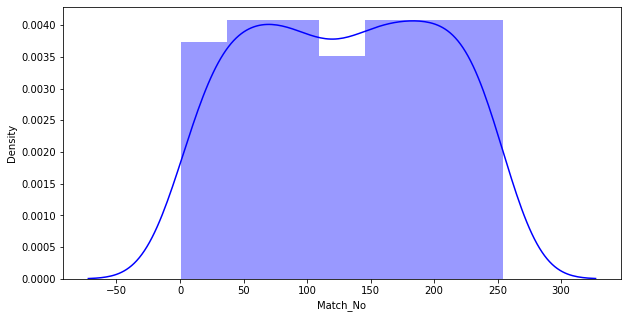

D/N


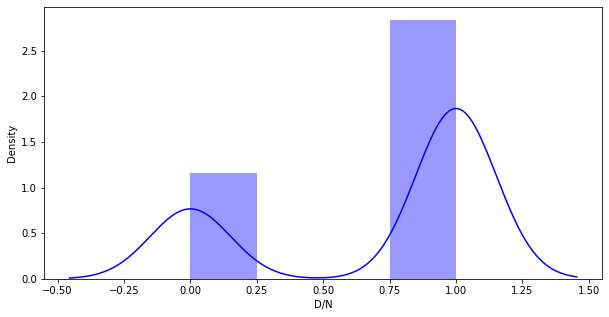

Runs


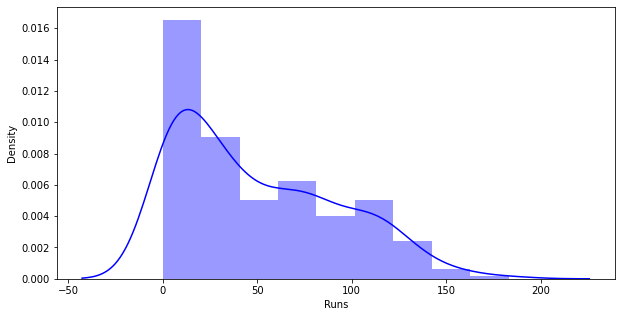

Balls_Faced


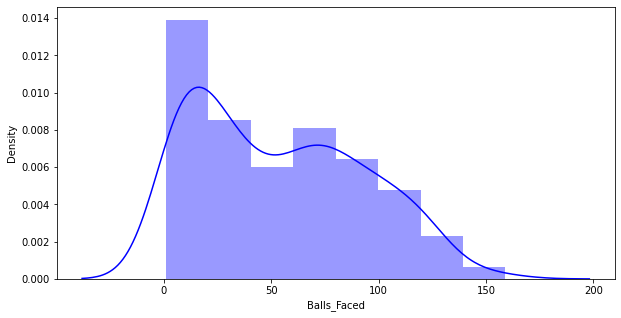

Strike_Rate


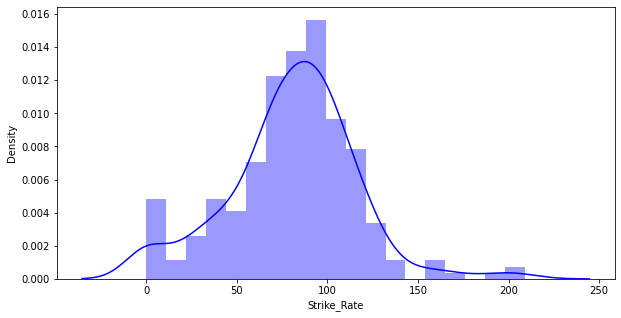

Progressive_Aggr


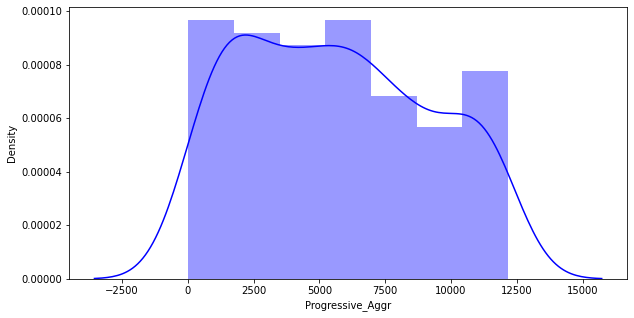

Progressive_Avg


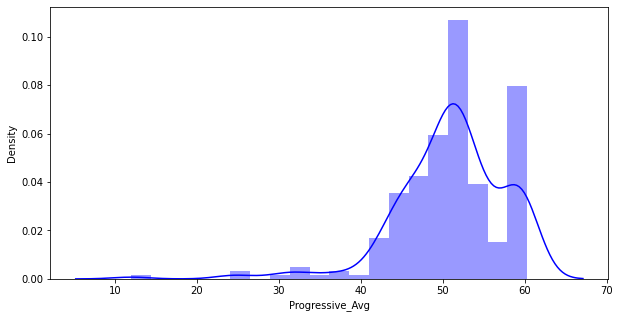

Progressive_Strike_Rate


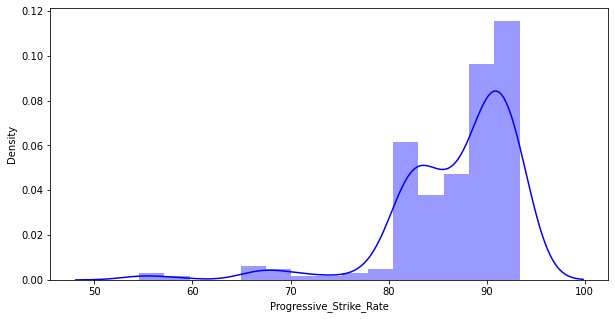

In [20]:
for i in df1.describe().columns:
    print(i)
    plt.figure(figsize=(10,5))
    sns.distplot(df1[i],color='b')
    plt.show()

### Oppositions most played against

Total matches played against the opposition

Sri Lanka               46
Australia               41
West Indies             38
England                 33
New Zealand             26
South Africa            25
Pakistan                13
Bangladesh              12
Zimbabwe                 5
Ireland                  2
Netherlands              1
United Arab Emirates     1
Afghanistan              1
Name: Versus, dtype: int64


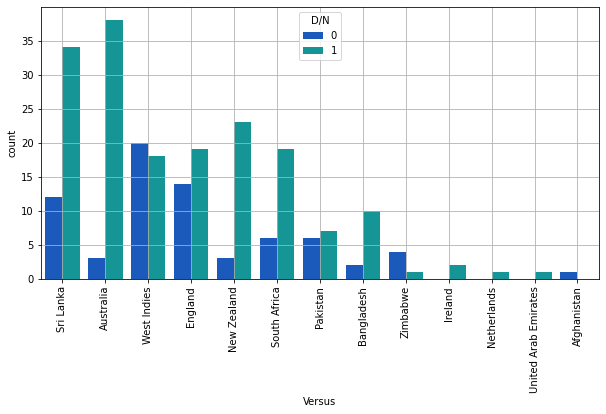

----------
Total D/N matches played
D/N
0     71
1    173
Name: Versus, dtype: int64


In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Versus'], order=df1.Versus.value_counts().index,hue=df['D/N'],palette='winter')
plt.xticks(rotation=90)
print('Total matches played against the opposition\n')
print(df1['Versus'].value_counts())
plt.grid()
plt.show()

print('-'*10)
print('Total D/N matches played')
print(df1.Versus.groupby(df1['D/N']).count())

### Grounds he has played in the average scores he has scored! 

In [22]:
average_scores_at_each_venue = pd.DataFrame(df1.Runs.groupby(df1.Ground).mean())
# average_scores_at_each_venue.sort_values(by='Runs',ascending=False)

In [31]:
count_of_grounds = pd.DataFrame(df1.Ground.value_counts())

In [32]:
count_average_grounds = pd.merge(average_scores_at_each_venue,count_of_grounds,on=average_scores_at_each_venue.index)

In [46]:
count_average_grounds.sort_values(by='Runs',ascending=False).head()

,key_0,Runs,Ground
3,Barsapara Cricket Stadium,140.0,8
5,Bellerive Oval,133.0,7
32,Nehru Stadium (Guwahati),105.0,3
18,JSCA International Stadium Complex,96.0,5
34,Newlands,94.0,3


### Processing "Dismissal Type"

In [42]:
dty = []
for i in df1['Dismissal_Type']:
    dty.append(i.split(' ')[0])

In [44]:
dty1 = []
for i in dty:
    if i == 'run':
        dty1.append('run out')
    elif i == 'not':
        dty1.append('not out')
    elif i == 'hit':
        dty1.append('hit wicket')
    else:
        dty1.append(i)
        
df1['Dismissal_Type_info'] = dty1

### Visualizing the dismissal types

c             147
not out        39
b              28
lbw            14
run out        11
st              4
hit wicket      1
Name: Dismissal_Type_info, dtype: int64

Total number of times dismissed : 244 (out of 254 matches)


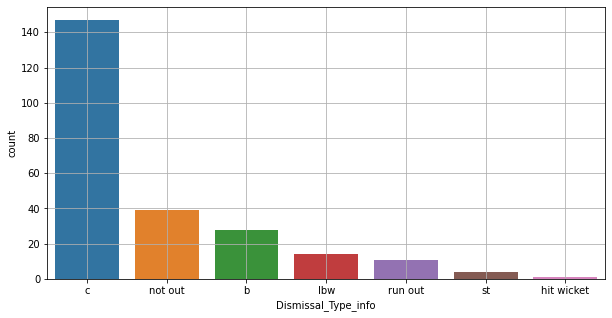

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Dismissal_Type_info'],order=df1['Dismissal_Type_info'].value_counts().index)
plt.grid()
print(df1['Dismissal_Type_info'].value_counts())

print('\nTotal number of times dismissed :',df1['Dismissal_Type_info'].value_counts().sum(),'(out of',len(df),'matches)')
plt.show()

In [47]:
# df1.head()

### Predictions

In [36]:
ml = df1.copy()

In [38]:
from sklearn.preprocessing import LabelEncoder

In [37]:
ml.head()

,Match_No,Date,Versus,Ground,D/N,Dismissal_Type,Runs,Balls_Faced,Strike_Rate,Progressive_Aggr,Progressive_Avg,Progressive_Strike_Rate,Status
0,1,18-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,lbw b K M D N Kulasekara,12,22,54.55,12,12.00,54.55,Out
1,2,20-08-2008,Sri Lanka,Rangiri Dambulla International Stadium,0,c C K Kapugedera b T Thushara,37,67,55.22,49,24.50,55.06,Out
2,3,24-08-2008,Sri Lanka,R Premadasa Stadium,1,run out,25,38,65.79,74,24.67,58.27,Out
3,4,27-08-2008,Sri Lanka,R Premadasa Stadium,1,b T Thushara,54,66,81.82,128,32.00,66.32,Out
4,5,29-08-2008,Sri Lanka,R Premadasa Stadium,1,lbw b K M D N Kulasekara,31,46,67.39,159,31.80,66.53,Out


In [ ]:
le = LabelEncoder()
ml['Ground_encoded'] = le.fit_transform(ml['Ground'])
ml['']